In [4]:
from collections import Counter

import glob
import os
import shutil
import random


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# plotly
# import chart_studio.plotly as py
# import plotly.graph_objs as go
# from plotly import tools
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)



from bs4 import  BeautifulSoup, SoupStrainer
import httplib2
import pprint
import re

import traceback

C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#####Extract the film script URL LIst


def get_url_list(genre):
    http = httplib2.Http()
    status, response = http.request('https://imsdb.com/genre/' + genre)
    url_list = []
    for link in BeautifulSoup(response, parse_only= SoupStrainer('a')):
        if link.has_attr('href'):
            url_in = link['href']
            if '/Movie Scripts/' in url_in:
                if link.has_attr('title'):
                    url_in = link['title']
                    url_in = url_in.replace(' ', '-')
                    url_in = re.sub(r'\:', '', url_in)
                    url_in = re.sub(r'-Script', '', url_in)
                    url_in = 'http://www.imsdb.com/scripts/' + url_in + '.html'
                    url_list.append(url_in)
                    print(url_in)
                    
    return url_list

def get_movie_script(url_list, genre):
    
    script_list =[]
    http = httplib2.Http()
    film_list= url_list
    print(len(film_list))
    num_movies = 0
    files = {}
    for index in range(len(film_list)):
        film_name  = film_list[index].strip('http://www.imsdb.com/scripts/')
        film_name = film_name.replace('.html','')
        film_name = film_name.replace(':', '')
        film_name = film_name.replace('?', '')
        film_name = film_name.replace('-', '')
        # special_char =  spe['&', ' ?',  '<', '>', '#', '{' ,  '}', '%', '~', '/', '\\' , '.']
            
 #       print(film_name)
        status, response = http.request(film_list[index])
        
        filename = genre + '/'+film_name+'.txt'
        
        files[film_name] = filename
        
        for link in BeautifulSoup(response, parse_only= SoupStrainer('pre')):
            num_movies = num_movies + 1
            #print(num_movies)
            script_list = link.text
            #print("hello")
            
    
            with open(filename, "w", encoding='utf-8', errors='ignore') as f:
                    #print("in loop")
                for s in script_list:
                    f.write(s)
                    
    return files 

def clean_text(filename):
    """
    Applies some pre-processing on the given text.
    """
    with open(filename, "r", encoding='utf-8', errors='ignore') as r:
        text = [row for row in r]
        
    #REMOVE TRANSITIONS OR CAMERA ANGLES
    transitions = ['SMASH CUT TO:', 'FINAL SHOOTING SCRIPT', 'CUT TO BLACK', 'SMASH TO:', 'RAPID CUT TO:', 'BACK TO:', 'BLACK SCREEN', 'FADE OUT TO WHITE LIGHT', 'CUT TO:', 'CUT BACK:', 'CUT BACK', 'DISSOLVE TO:', 'CONTINUED', 'RAPID CUT', 'RAPID CUT TO', 'FADE TO:', \
                   'FADE IN:', 'FADES TO BLACK', 'FADE TO', 'CUT TO', 'FADE UP:', 'BEAT', 'AFTERNOON', 'EVENING', 'CONTINUED:', 'FADE IN', \
                   'TO:', 'CLOSE-UP','WIDE ANGLE','CONTINUED:', 'TITLE:', 'FADE IN','DISSOLVE TO','CUT-TO','CUT TO', 'CUT TO BLACK',\
                   'INTERCUT', 'INSERT', 'CLOSE UP', 'TITLE CARD', 'PAUSE', 'SOUND', 'SONG CONTINUES OVER', 'BACK TO SCENE',\
                   'CUT', 'WATCH', 'CU WATCH', 'BLACK', 'BACK IN SILENCE', 'SUBTITLE:', 'CLOSE', 'ON THE ROOF','CUT HARD TO:',\
                   'THE SCREEN', 'TITLE', 'PROLOGUE', 'SPLITSCREEN.', 'OMITTED', 'BLACK.',\
                   'FADE OUT:', 'FADE OUT.', 'FADE OUT', 'DISSOLVE', 'NEW ANGLE', 'WIDE SHOT']
    # remove directors or the film production company
    best_ = ['BEST DIRECTOR', 'BEST ADAPTED SCREENPLAY', 'SENTENCE', 'BROADCASTING STATUS', 'BEST COSTUME DESIGN', 'TWENTIETH CENTURY FOX', 'BEST ORIGINAL SCORE', 'BEST ACTOR', 'BEST SUPPORTING ACTOR', 'BEST CINEMATOGRAPHY', 'BEST PRODUCTION DESIGN', 'BEST FILM EDITING', 'BEST SOUND MIXING', 'BEST SOUND EDITING', 'BEST VISUAL EFFECTS']
    #text = re.sub('\d+', '', text)
    tex = []
    for x in text:
        tx = x.replace('\t', ' ').lstrip(" ")
        tx = re.sub(r'^\d+\n', r'', tx)
        tx = re.sub(r'\(.*\)', r'', tx)
        tx = re.sub(r'\#\d+', r'', tx)
        #tx = tx.replace('\n', '')
        #tx = re.sub(r'\d+', r'', tx)
        tx = re.sub(r'(((INT\.|EXT\.)\s[A-Z]+.*)|((INT\.|EXT\.)\s+[A-Z]+.*)|((INT\.|EXT\.)\s[A-Z]+)|((INT\.|EXT\.)\s[0-9]+.*)|\
        ((INT\./EXT\.|EXT\./INT\.)\s[A-Z]+.*)|((INT\.|EXT\.)\s[0-9]+)|((INT\./EXT\.|EXT\./INT\.)\s[0-9]+.*)|(INT\.\s+.*|EXT\.\s+.*)\
        |((INT\.|EXT\.)\s+[A-Z]+\W+.+)|((INT|EXT)\s+[A-Z]+.*)|((INT|EXT)\s+[A-Z]+.*)|((INT|EXT)\s[A-Z]+)|((INT|EXT)\s[0-9]+.*)|\
        ((INT/EXT|EXT/INT)\s+[A-Z]+.*)|((INT|EXT)\s+[0-9]+)|((INT/EXT|EXT/INT)\s+[0-9]+.*)|((I/E\.|E/I\.)\s+[A-Z].*)\
        |((INT|EXT)\s+[A-Z]+\W+.+)|((I/E\.|E/I\.)\s+.*))', 'SCC', tx)
        tx = re.sub(r'(^\d+\w+\.\s\n)|(^\d+\.\s\n)|(^\d+\.\n)', r'', tx)
        tx = re.sub(r'^\W+', r'', tx)
        tx = re.sub(r'^\d+\.', r'', tx)
        tx = re.sub(r'^\d+/\d+/\d+', r'', tx)
        tx = re.sub(r'ANGLE.*', '', tx)
        tx = re.sub(r'(\'m|\’m)', r' am', tx)
        tx = re.sub(r'(\'ll|\’l)', r' will', tx)
        tx = re.sub(r'(\'re|\’re)', r' are', tx)
        tx = re.sub(r'(\'d|\’d)', r' had', tx)
        tx = re.sub(r'(\'ve|\’ve)', r' have', tx)
        tx = re.sub(r'SEQ\.\s+\d+', r'', tx)
        #tx = re.sub(r'Final\s+\d+\.', r'', tx)
        tx = re.sub(r'Goldenrod\s+\-\s+\d+\.\d+\.\d+\s+\d+\.', r'', tx)
        tx = re.sub(r'(^\d+\s+\d+\s+\d+\s+\-\sRev\.\s\d+/\d+/\d+\s+\d+[A-Z])|(^\d+\s+\d+\s+\d+\s+\-\sRev\.\s\d+/\d+/\d+\s+\d+)', '', tx)
        tx = re.sub(r'([A-Z]+[A-Z]+\sREV\s\d+\-\d+\-\d+\s\d+\.)|([A-Z]+[A-Z]+\sREV\s\d+\-\d+\-\d+\s\d+[A-Z]\.)|(DBL\.\s[A-Z]+[A-Z]+\sREV\s\d+\-\d+\-\d+\s\d+\.)', '', tx)
        #tx = re.sub(r'^TITLE:\n', '', tx)
        #end = re.compile(r'THE END.*|FADE OUT.*', re.MULTILINE)
        #tx = end.sub(r'', tx)
        trans = re.compile("({})+".format("|".join(re.escape(c) for c in transitions)))
        tx = trans.sub(r'', tx)
        #tx = re.sub(r'[A-Z]+\'S', '', tx)
        #tx = tx.replace('[^a-zA-Z]', '')
        #tx = tx.replace('', '')
        #tx = tx.strip()
        #tx = re.sub(r'\d+', r'', tx)
        tx = re.sub(r"[^a-zA-Z0-9.,?'&\n ]+", '', tx)
        #tx = re.sub(r'\W+', ' ', tx)
        tex.append(tx)
    txt = "".join([s for s in tex if s.strip()])
    txt = re.sub(r'\nTHE END\n(.|\n)*', '', txt)
    
    return txt

def scene_wise_dataframe(filename, genre):
    
    df_res = pd.DataFrame(columns=['Scene', 'Genre']) 
    
        
    try:
        clean_text_animation = clean_text(filename)
            
        x = clean_text_animation.split("SCC")
            
        df_res["Scene"] = x
        
            
    except:
        traceback.print_exc()
        
    df_res["Genre"] = genre
    return df_res 

In [5]:
scenes_lotr1 = scene_wise_dataframe("LordoftheRingsFellowshipoftheRing.txt", "Action") 
scenes_lotr2 = scene_wise_dataframe("LordoftheRingsReturnoftheKing.txt", "Action")
lotr_df = pd.DataFrame()
lotr_df = pd.concat([scenes_lotr1, scenes_lotr2], ignore_index = True, sort = False)

Text(0.5, 1.0, 'Distribution of number of words in each Scene')

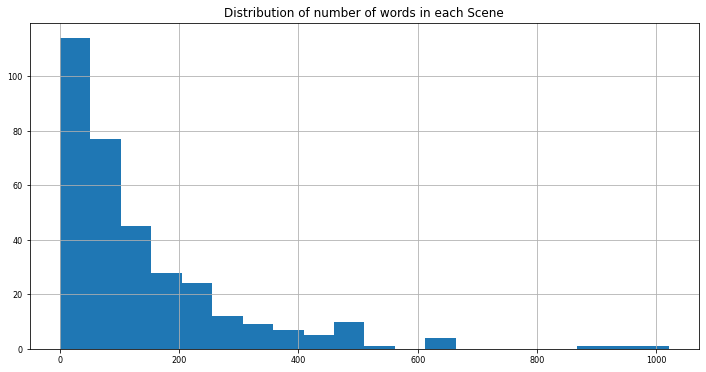

In [6]:
lotr_df['NumWords'] = lotr_df ['Scene'].apply(lambda x: len(x.split()))
lotr_df [['NumWords']].hist(figsize=(12, 6), bins=20, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each Scene")

In [8]:
all_words = ''.join([word for word in lotr_df['Scene']]).replace('\n', ' ')
all_words[0:1000]

"SUPER New Line Cinema Presents SUPER A Wingnut Films Production  CONTINUES... ELVISH SINGING....A WOMAN'S VOICE IS whispering, tinged with SADNESS and REGRET GALADRIEL  I amar prestar sen han mathon ne nen, han mathon ne chae...a han noston ned wilith. The world is changed I feel it in the water, I feel it in the earth, I smell it in the air...Much that once was is lost, for none now live who remember it. SUPER THE LORD OF THE RINGS  IMAGE FLICKERING FIRELIGHT. The NOLDORIN FORGE in EREGION. MOLTEN GOLD POURS from the lip of an IRON LADLE. GALADRIEL  It began with the forging of the Great Rings. IMAGE THREE RINGS, each set with a single GEM, are received by the HIGH ELVESGALADRIEL, GILGALAD and CIRDAN. GALADRIEL  Three were given to the Elves, immortal, wisest...fairest of all beings. IMAGE SEVEN RINGS held aloft in triumph by the DWARF LORDS. GALADRIEL  Seven to the Dwarf Lords, great miners and craftsmen of the mountain halls. IMAGE NINE RINGS clutched tightly by the KINGS OF MEN...

In [9]:
hero_characteristics=['brave','loyal','caring','kind','honest','smart','friend','family','heroic','good','celebrate','happy','hoping','fear','promise','angry','shock']

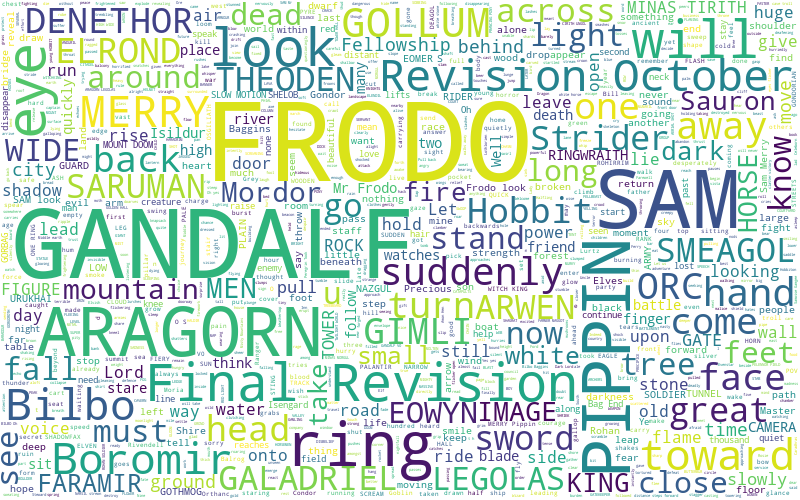

In [10]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

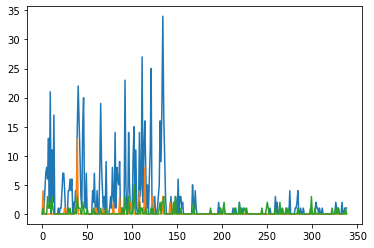

In [11]:
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in paragraphs:
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

positive_charecters = ["Frodo", "Pippin", "Gandalf", "Merry", 'Aragorn']
negative_charecters = ['Gollum', 'Saruman', 'The King Of The Dead', 'Lurtz', 'Gothmog', 'Balrog']
hero_characteristics=['heroic','good','celebrate','happy','hoping','fear','promise','angry','shock','brave','loyal','caring','kind','honest','smart','friend','family']



pos_chars = get_any_words_paragraphs(list(lotr_df["Scene"]), positive_charecters)
negative_chars = get_any_words_paragraphs(list(lotr_df["Scene"]), negative_charecters)
heroic_occurences = get_any_words_paragraphs(list(lotr_df["Scene"]), hero_characteristics)


plt.plot(pos_chars)
plt.plot(negative_chars)
plt.plot(heroic_occurences)


In [12]:
pos_char_occurences = [bool(v) for v in pos_chars]
negative_char_occurences = [bool(v) for v in negative_chars]
heroic_occurences_bool = [bool(v) for v in heroic_occurences] 


df_heroic2 = pd.DataFrame(list(zip(heroic_occurences, negative_char_occurences, pos_char_occurences)), columns =['Heroic', 'Bad', 'Good'])

df_heroic2.head(10)




,Heroic,Bad,Good
0,0,False,False
1,1,True,False
2,0,False,True
3,0,False,True
4,0,False,True
5,0,False,True
6,3,False,True
7,1,False,True
8,1,False,True
9,2,False,True


In [13]:
import pymc3 as pm
fml = 'Heroic ~ Bad + Good + Bad:Good'
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_heroic2, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(4000, cores = 2)
    

    

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, Bad[T.True]:Good[T.True], Good[T.True], Bad[T.True], Intercept]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 19 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.881150470681453, but should be close to 0.8. Try to increase the number of tuning steps.


In [14]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs).iterrows()})

    for i, mn in enumerate(pm.summary(trcs)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [15]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

['Intercept',
 'Bad[T.True]',
 'Good[T.True]',
 'Bad[T.True]:Good[T.True]',
 'mu',
 'alpha']

/var/folders/vv/q4cvdpxd5vb5y_ngs0c23mfw0000gn/T/ipykernel_17531/1623918701.py:8: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(trcs, figsize=(12,nrows*1.4),
/Users/athipathi/opt/anaconda3/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/traceplot.py:214: UserWarning: A valid var_name should be provided, found {'a', 'G', 'm', 'I', 'B'} expected from {'Good[T.True]', 'Bad[T.True]:Good[T.True]', 'Bad[T.True]', 'mu', 'Intercept', 'alpha'}
  warnings.warn(


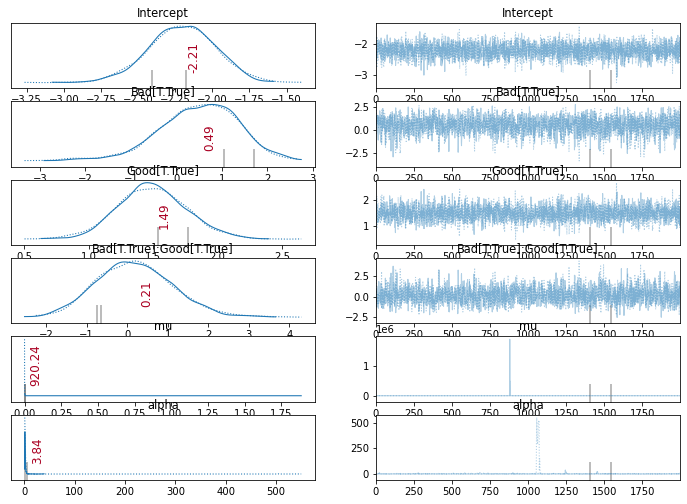

In [16]:
with model:
    plot_traces(trace[2000:], varnames=rvs);